In [37]:
%load_ext autoreload
%autoreload 2
import sys;sys.path.append('modules')
from utils import *

%matplotlib inline    
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Info about fill

In [38]:
fill_number = 6711
fill_info = get_fill_info(fill_number)

# TbT - remove overlap

In [39]:
#modes = ['FLATTOP', 'FLATTOP', 'FLATTOP']
modes = ['FLATTOP']
time = {}
time['FLATTOP'] = (pd.Timestamp('2018-05-22 00:53:00+00:00'), pd.Timestamp('2018-05-22 00:53:02+00:00') )
#time['FLATTOP1'] = (pd.Timestamp('2018-05-22 00:53:02+00:00'),pd.Timestamp('2018-05-22 00:54:02+00:00'))
#time['FLATTOP2'] = (pd.Timestamp('2018-05-22 00:54:02+00:00'),fill_info['FLATTOP']['endTime'] )
df = get_data(modes, time, rename_duplicates=False, remove_overlap=True)

Flatten: ...
average overlap 248.73 samples
Flatten: ...
average overlap 248.73 samples
Flatten: ...
average overlap 248.73 samples
Flatten: ...
average overlap 248.73 samples


# Organize 50 Hz h by FFT - sliding window 8000 turns

In [40]:
df_fft = get_fft(df)

B1 H FLATTOP
B1 V FLATTOP
B2 H FLATTOP
B2 V FLATTOP


# Time evolution of phase of 50 Hz harmonics

B1 H FLATTOP
B1 H FLATTOP


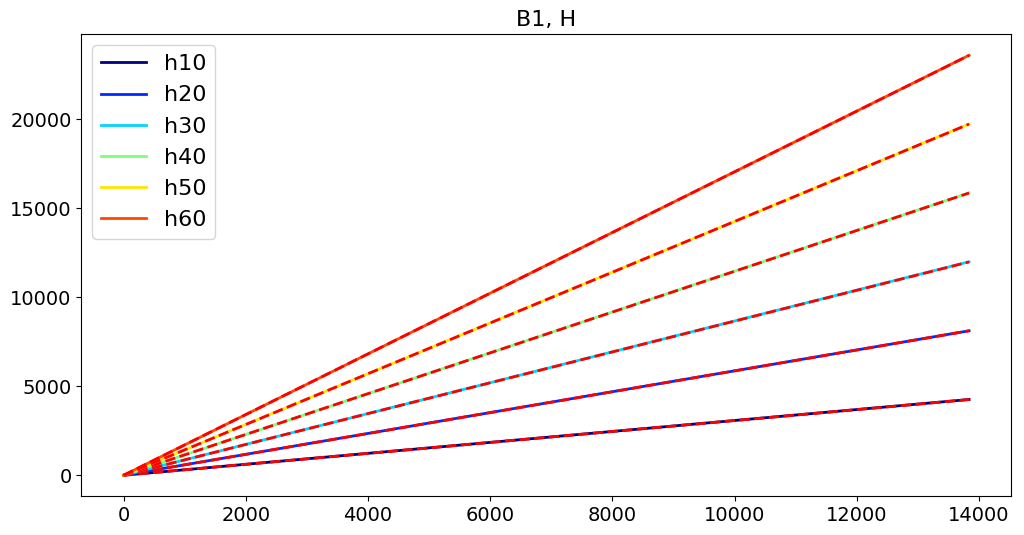

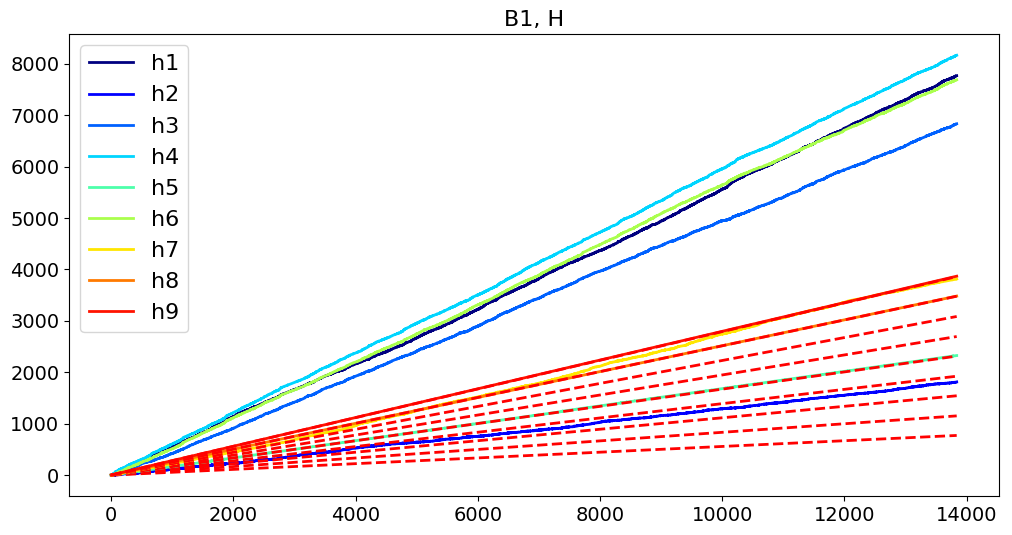

In [68]:
hs = np.arange(10,70,10)
plot_harm(hs, df_fft, status = ['FLATTOP'],beam = ['B1'], plane=['H'], mode='angle', fit_slope=True)
hs = np.arange(1,10,1)
plot_harm(hs, df_fft, status = ['FLATTOP'],beam = ['B1'], plane=['H'], mode='angle', fit_slope=True)

B1 H FLATTOP
Threshold set to  0.7
Top Absolute Correlations
106  108    0.999942
3    106    0.999939
     108    0.999932
23   35     0.999926
106  111    0.999924
100  106    0.999909
4    106    0.999899
3    100    0.999881
35   47     0.999875
4    6      0.999872
100  108    0.999871
4    108    0.999869
47   52     0.999849
108  111    0.999848
100  111    0.999842
40   52     0.999838
3    4      0.999835
4    111    0.999830
23   47     0.999827
3    6      0.999814
6    106    0.999801
4    100    0.999800
40   47     0.999798
3    111    0.999786
6    108    0.999785
1    110    0.999753
42   54     0.999733
47   54     0.999733
1    4      0.999732
38   40     0.999703
              ...   
29   95     0.712505
13   53     0.712306
5    15     0.711841
57   97     0.711641
16   98     0.711143
13   57     0.710056
70   107    0.709791
64   95     0.709559
95   103    0.708414
69   70     0.707957
72   76     0.707820
74   95     0.707284
20   37     0.707172
60   86     0.7

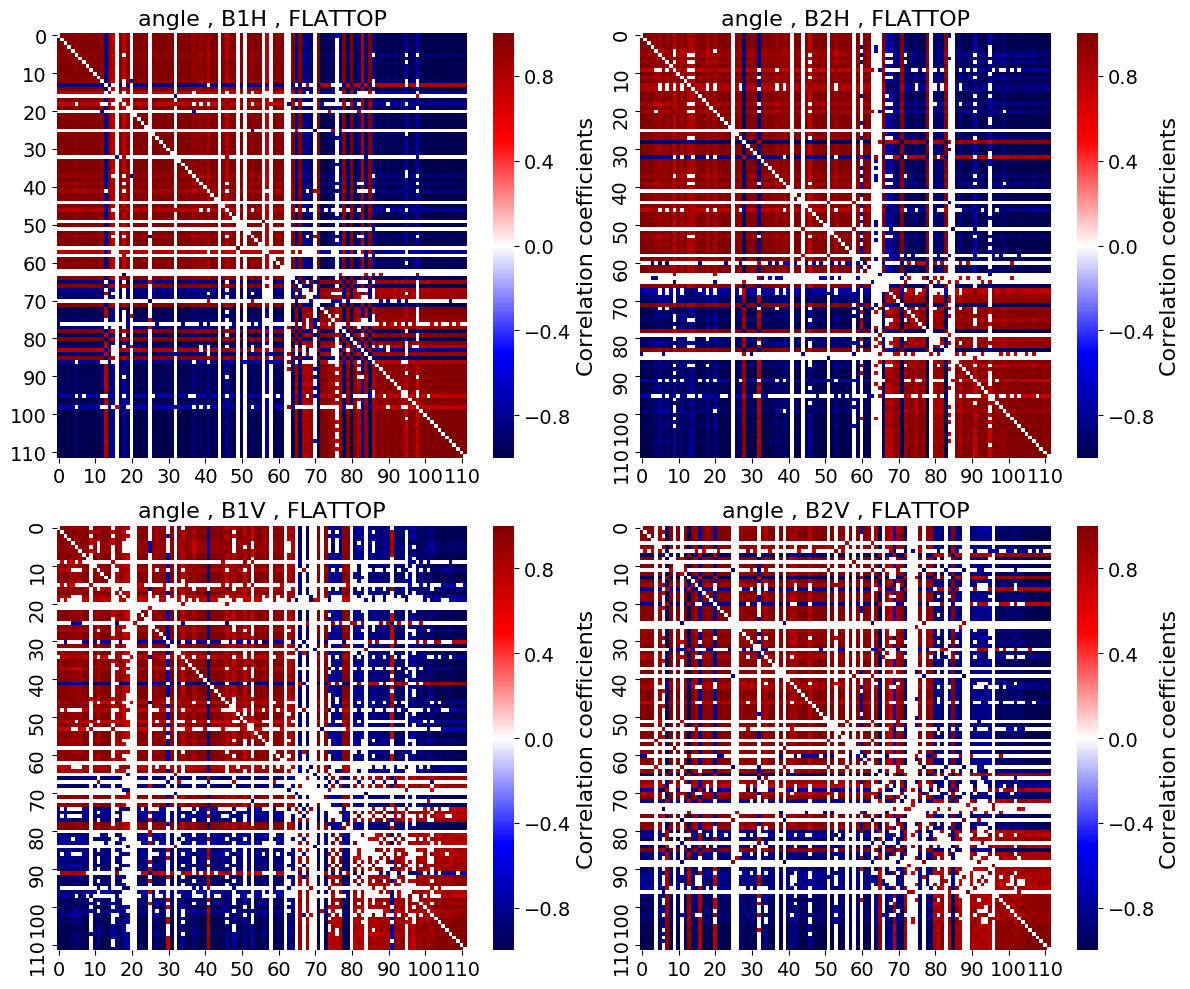

In [93]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10),sharex=True, sharey=True)
corr, strongest, bins, pvals = heatmaps(df_fft, status=['FLATTOP'], beam=['B1', 'B2'], plane=['H', 'V'], mode='angle', ax=ax, threshold=0.7)
plt.show()

B1 H FLATTOP
B1 H FLATTOP


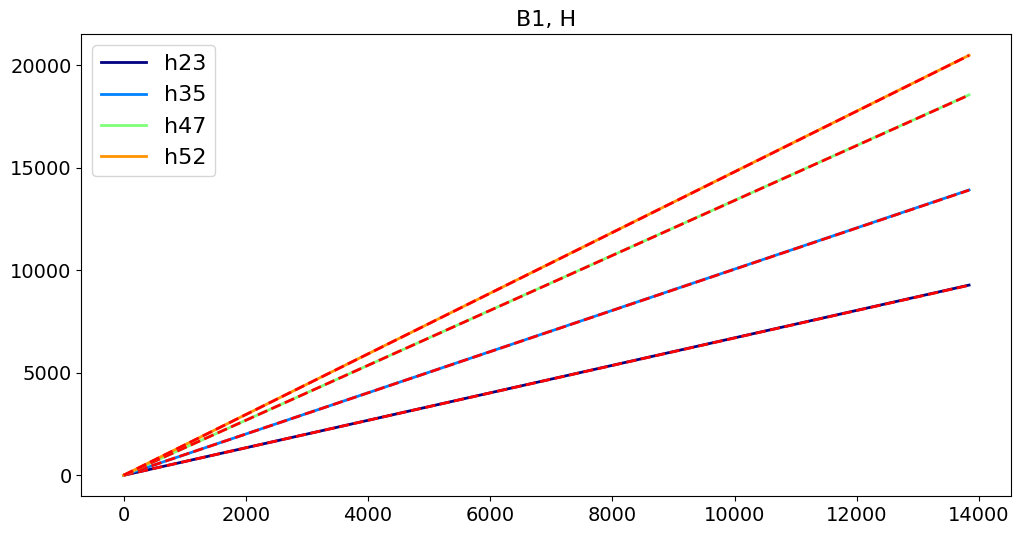

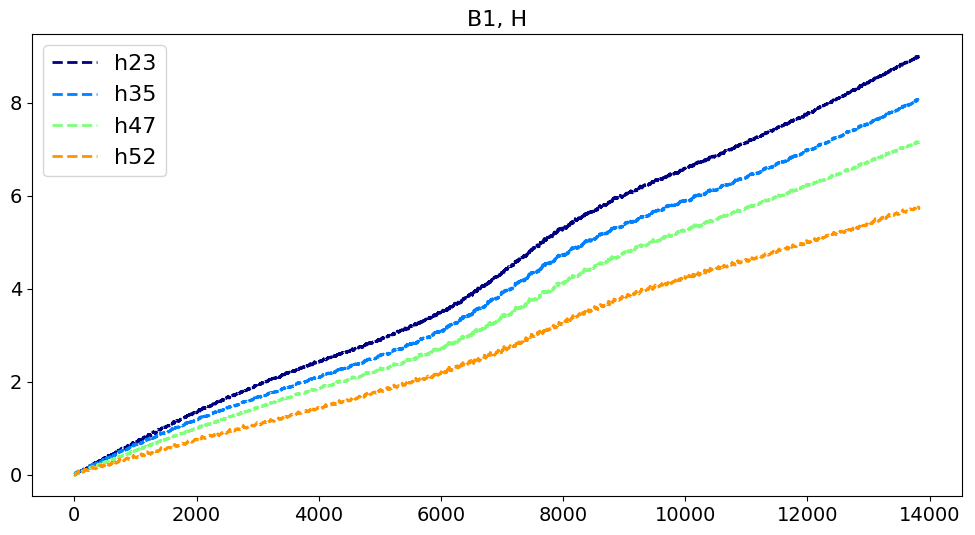

In [90]:
hs = [23,35, 47, 52]
plot_harm(hs, df_fft, status = ['FLATTOP'],beam = ['B1'], plane=['H'], mode='angle', fit_slope=True)
plot_harm(hs, df_fft, status = ['FLATTOP'],beam = ['B1'], plane=['H'], mode='angle', remove_slope=True)